In [1]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from datetime import datetime as dt

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [2]:
# 데이터 불러오기
df = pd.read_pickle('/content/서울시.pkl')
print(df.head())
df.dtypes

   침수면적(1,000㎡)  총강수량(mm)  기간(일)   태풍  평균기온(℃)  최다강수1H  최대풍속(m/s)         일자  \
2           0.4     284.5      5  0.0     24.3    25.0        5.5 2013-07-13   
3           1.8     410.5      8  0.0     23.6    37.5        6.9 2002-08-08   
4           4.8     306.5      4  0.0     23.2    72.5        4.9 2011-07-28   
5           7.1     340.0      5  0.0     23.6    39.0        5.7 2003-08-25   
6          15.0     764.5     13  0.0     25.0    46.5        9.1 1999-07-29   

  행정구역  
2  도봉구  
3  도봉구  
4  도봉구  
5  도봉구  
6  도봉구  


,0
"침수면적(1,000㎡)",float64
총강수량(mm),float64
기간(일),int64
태풍,float64
평균기온(℃),float64
최다강수1H,float64
최대풍속(m/s),float64
일자,datetime64[ns]
행정구역,object




# 시각화
- folium 라이브러리를 이용하여 지도에 침수 발생 횟수 시각화
  
  + 구글지도를 통해 각 행정구역의 구청 좌표 얻기
    - 구글 maps API를 이용한다면 좌표를 쉽게 얻을 수 있을지 모르겠으나, 서울시의 행정구역이 25개 뿐이며, 일회성으로 얻는 데이터이기 때문에 API는 사용하지 않습니다.


In [3]:
soul = { # 구: (구청위도, 구청경도)
    '서울시': (37.566755, 126.978139),
    '강남구': (37.517711, 127.047450),
    '강동구': (37.530335, 127.123802),
    '강북구': (37.639930, 127.025540),
    '강서구': (37.551097, 126.849617),
    '관악구': (37.478431, 126.951617),
    '광진구': (37.544831, 127.089742),
    '구로구': (37.495649, 126.887650),
    '금천구': (37.462941, 126.900995),
    '노원구': (37.654197, 127.056701),
    '도봉구': (37.668952, 127.047092),
    '동대문구': (37.574380, 127.039833),
    '동작구': (37.501398, 126.951158),
    '마포구': (37.566412, 126.902007),
    '서대문구': (37.579473, 126.936495),
    '서초구': (37.483689, 127.032785),
    '성동구': (37.563554, 127.036956),
    '성북구': (37.589553, 127.016743),
    '송파구': (37.514666, 127.105915),
    '양천구': (37.517121, 126.866586),
    '영등포구': (37.526441, 126.895942),
    '용산구': (37.532471, 126.990703),
    '은평구': (37.602894, 126.929288),
    '종로구': (37.573630, 126.978930),
    '중구': (37.563963, 126.997627),
    '중랑구': (37.606500, 127.093206)
}

In [4]:
df['위도'] = df['행정구역'].apply(lambda x: soul[x][0])
df['경도'] = df['행정구역'].apply(lambda x: soul[x][1])
print(df.head())
df.dtypes

   침수면적(1,000㎡)  총강수량(mm)  기간(일)   태풍  평균기온(℃)  최다강수1H  최대풍속(m/s)         일자  \
2           0.4     284.5      5  0.0     24.3    25.0        5.5 2013-07-13   
3           1.8     410.5      8  0.0     23.6    37.5        6.9 2002-08-08   
4           4.8     306.5      4  0.0     23.2    72.5        4.9 2011-07-28   
5           7.1     340.0      5  0.0     23.6    39.0        5.7 2003-08-25   
6          15.0     764.5     13  0.0     25.0    46.5        9.1 1999-07-29   

  행정구역         위도          경도  
2  도봉구  37.668952  127.047092  
3  도봉구  37.668952  127.047092  
4  도봉구  37.668952  127.047092  
5  도봉구  37.668952  127.047092  
6  도봉구  37.668952  127.047092  


,0
"침수면적(1,000㎡)",float64
총강수량(mm),float64
기간(일),int64
태풍,float64
평균기온(℃),float64
최다강수1H,float64
최대풍속(m/s),float64
일자,datetime64[ns]
행정구역,object
위도,float64


In [5]:
import folium
import pandas as pd

# -----------------------------------------
# 1. 행정구역별 침수 발생 횟수 계산
# -----------------------------------------
count_df = df.groupby("행정구역").size().reset_index(name="침수발생횟수")

# 좌표 & 면적 컬럼이 들어 있으므로 그룹된 DF에 추가
count_df = count_df.merge(df[['행정구역', '위도', '경도']].drop_duplicates(), on='행정구역', how='left')

# -----------------------------------------
# 2. folium 지도 생성 (서울 중심)
# -----------------------------------------
center_lat, center_lng = soul['서울시']

m = folium.Map(location=[center_lat, center_lng], zoom_start=10)

# -----------------------------------------
# 3. 침수 횟수 기반 반경 계산
# -----------------------------------------
for _, row in count_df.iterrows():
    행정구역 = row['행정구역']
    lat = row['위도']
    lng = row['경도']
    cnt = row['침수발생횟수']

    # 원의 반경 (침수 횟수 × 200m)
    radius = cnt * 200

    folium.Circle(
        location=[lat, lng],
        radius=radius,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        popup=f"{행정구역} - 침수 {cnt}회"
    ).add_to(m)

# -----------------------------------------
# 4. 결과 저장
# -----------------------------------------
m.save("seoul_flood_map.html")

print("완료! → seoul_flood_map.html 로 저장됨")
m

완료! → seoul_flood_map.html 로 저장됨


# 행정구역별 침수횟수 시각화
- 각각의 원의 크기는 해당 행정구역의 침수횟수에 비례하며, 원의 중심은 행정구역의 구청이 중심이 되도록 시각화를 진행하였습니다.

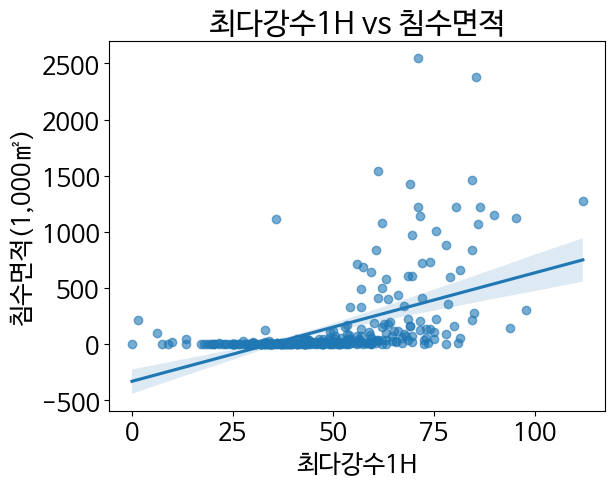

In [9]:
sns.regplot(
    data=df,
    x='최다강수1H',
    y='침수면적(1,000㎡)',
    scatter_kws={'alpha':0.6}
)
plt.title('최다강수1H vs 침수면적')
plt.show()

# 단기간 강수량과 침수피해의 관계
- 단시간의 강수가 침수피해를 확대함을 알 수 있습니다.

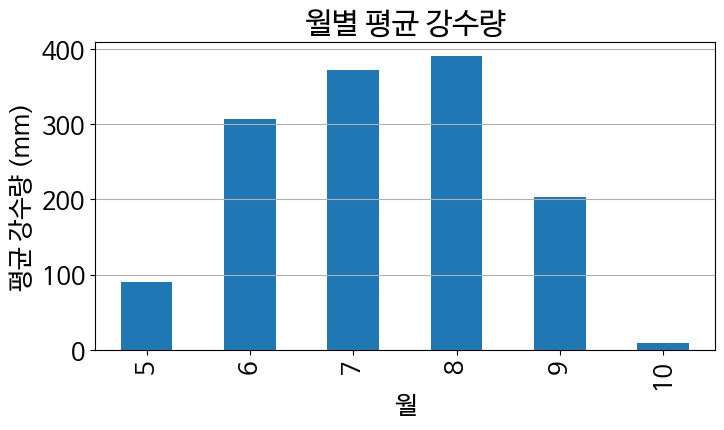

In [7]:
df['month'] = df['일자'].dt.month
monthly_rain = df.groupby('month')['총강수량(mm)'].mean()

plt.figure(figsize=(8, 4))
monthly_rain.plot(kind='bar')
plt.xlabel("월")
plt.ylabel("평균 강수량 (mm)")
plt.title("월별 평균 강수량")
plt.grid(True, axis='y')
plt.show()

# 침수가 잦은 기간 분석
- 시각화를 진행할 때 쓰인 데이터는 침수피해가 존재하는 날의 데이터만 존재하므로, 주로 6~8월인 장마기간 동안 침수가 많이 발생함을 알 수 있습니다.

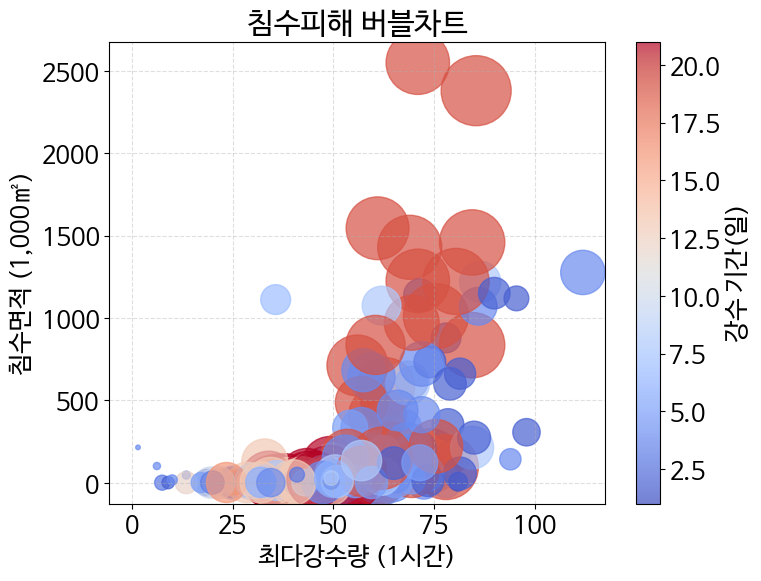

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(
    df['최다강수1H'],                 # x축
    df['침수면적(1,000㎡)'],           # y축
    s=df['총강수량(mm)'] * 2,         # 버블 크기 (스케일 조절)
    c=df['기간(일)'],                 # 색상 기준
    cmap='coolwarm',
    alpha=0.7,
    # edgecolors='black',               # 버블 테두리 색
    # linewidths=1                      # 테두리 두께
)

plt.xlabel('최다강수량 (1시간)')
plt.ylabel('침수면적 (1,000㎡)')
plt.title('침수피해 버블차트')

plt.colorbar(label='강수 기간(일)')
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

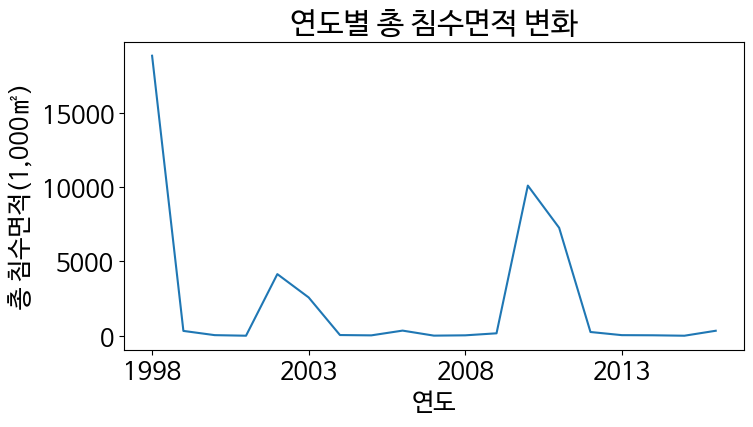

In [22]:
df['연도'] = df['일자'].dt.year.astype(int)

yearly = df.groupby('연도')['침수면적(1,000㎡)'].sum()

plt.figure(figsize=(8, 4))
plt.plot(yearly.index, yearly.values)
plt.title('연도별 총 침수면적 변화')

# 🔹 x축을 5년 단위로 표시
years = yearly.index
plt.xticks(
    ticks=years[::5],        # 5년 간격
    labels=years[::5].astype(int)
)

plt.xlabel('연도')
plt.ylabel('총 침수면적(1,000㎡)')
plt.show()

In [20]:
print(df['일자'].min())
print(df['일자'].max())

1998-05-02 00:00:00
2016-10-05 00:00:00


- 해당 데이터는 1998~2016년 간의 서울시 침수피해 데이터이며, 해당 데이터가 꾸준히 꾸준히 업데이트되지 않았으므로, 중간중간 비어있는 데이터가 많습니다.

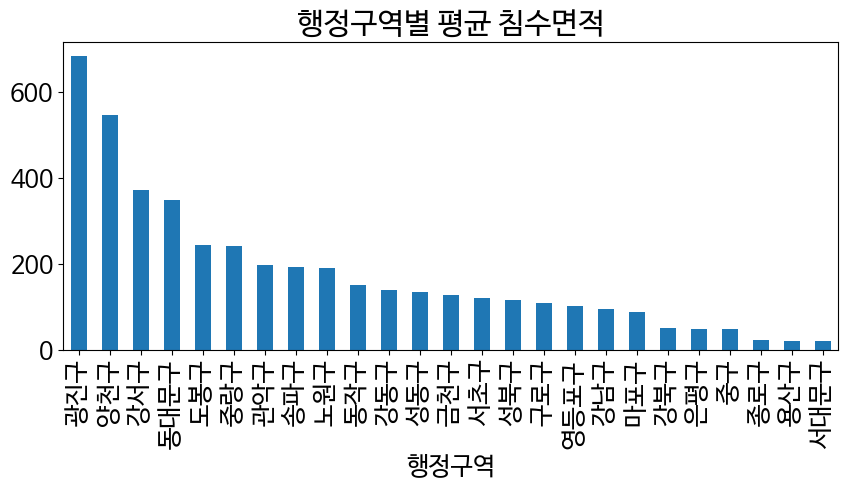

In [24]:
region_mean = df.groupby('행정구역')['침수면적(1,000㎡)'].mean().sort_values(ascending=False)

region_mean.plot(kind='bar', figsize=(10,4))
plt.title('행정구역별 평균 침수면적')
plt.show()

# 행정구역별 침수피해 분석
- 광진구, 양천구, 강서구 순으로, 침수가 일어났을 때 침수피해가 큰 행정구역을 확인할 수 있습니다.
